# **Playground Series Season 5 Episode 5**

# **Calorie Expenditure Prediction**

### Library Importation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, VotingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor

### Data Loading and Initial Exploration in the Data

In [17]:
train = pd.read_csv(r"C:\Users\AVIRAL\OneDrive\Desktop\PlayGround Series\playground-series-s5e5\train.csv")
train.head(4)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0


In [18]:
test = pd.read_csv(r"C:\Users\AVIRAL\OneDrive\Desktop\PlayGround Series\playground-series-s5e5\test.csv")
test.tail(3)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
249997,999997,female,31,164.0,64.0,14.0,98.0,40.1
249998,999998,female,62,158.0,61.0,25.0,106.0,40.7
249999,999999,male,31,199.0,96.0,15.0,98.0,39.9


In [19]:
samp = pd.read_csv(r"C:\Users\AVIRAL\OneDrive\Desktop\PlayGround Series\playground-series-s5e5\sample_submission.csv")
samp

,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283
...,...,...
249995,999995,88.283
249996,999996,88.283
249997,999997,88.283
249998,999998,88.283


In [20]:
print(f'The number of rows present in this Train data are {train.shape[0]}')
print(f'The number of columns present in this Train data are {train.shape[1]}')

The number of rows present in this Train data are 750000
The number of columns present in this Train data are 9


In [21]:
print(f'The number of rows present in this Test data are {test.shape[0]}')
print(f'The number of columns present in this Test data are {test.shape[1]}')

The number of rows present in this Test data are 250000
The number of columns present in this Test data are 8


In [22]:
train.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


INFERENCES :

1) Data has intotal of 9 columns (including target one)

2) Data has only one categorical column that is SEX rest all are continous ones.

3) The ID column might have all unique values so we can change it to Index.

In [24]:
train['id'].unique()

array([     0,      1,      2, ..., 749997, 749998, 749999], dtype=int64)

In [25]:
train.set_index("id", inplace=True)
train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [26]:
test.set_index("id", inplace=True)
test.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,,
750000,male,45,177.0,81.0,7.0,87.0,39.8
750001,male,26,200.0,97.0,20.0,101.0,40.5
750002,female,29,188.0,85.0,16.0,102.0,40.4
750003,female,39,172.0,73.0,20.0,107.0,40.6
750004,female,30,173.0,67.0,16.0,94.0,40.5


In [27]:
samp.set_index("id", inplace=True)
samp

,Calories
id,
750000,88.283
750001,88.283
750002,88.283
750003,88.283
750004,88.283
...,...
999995,88.283
999996,88.283
999997,88.283


### COrrelation Plot

<Axes: >

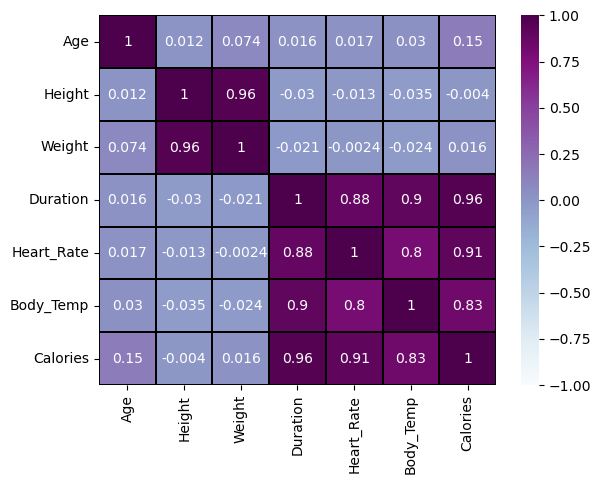

In [28]:
sns.heatmap(data = train.corr(numeric_only=True), vmax=1,vmin = -1, cmap="BuPu", annot=True, linecolor='black',linewidths=0.05)

In [29]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,750000.0,41.420404,15.175049,20.0,28.0,40.0,52.0,79.0
Height,750000.0,174.697685,12.824496,126.0,164.0,174.0,185.0,222.0
Weight,750000.0,75.145668,13.982704,36.0,63.0,74.0,87.0,132.0
Duration,750000.0,15.421015,8.354095,1.0,8.0,15.0,23.0,30.0
Heart_Rate,750000.0,95.483995,9.449845,67.0,88.0,95.0,103.0,128.0
Body_Temp,750000.0,40.036253,0.779875,37.1,39.6,40.3,40.7,41.5
Calories,750000.0,88.282781,62.395349,1.0,34.0,77.0,136.0,314.0


### Exploratory Data Analysis

In [30]:
train.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

In [31]:
num_cols = ['Age', 'Height',  'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories']

cat_cols = ['Sex']

### Univariate Analysis for Numerical columns

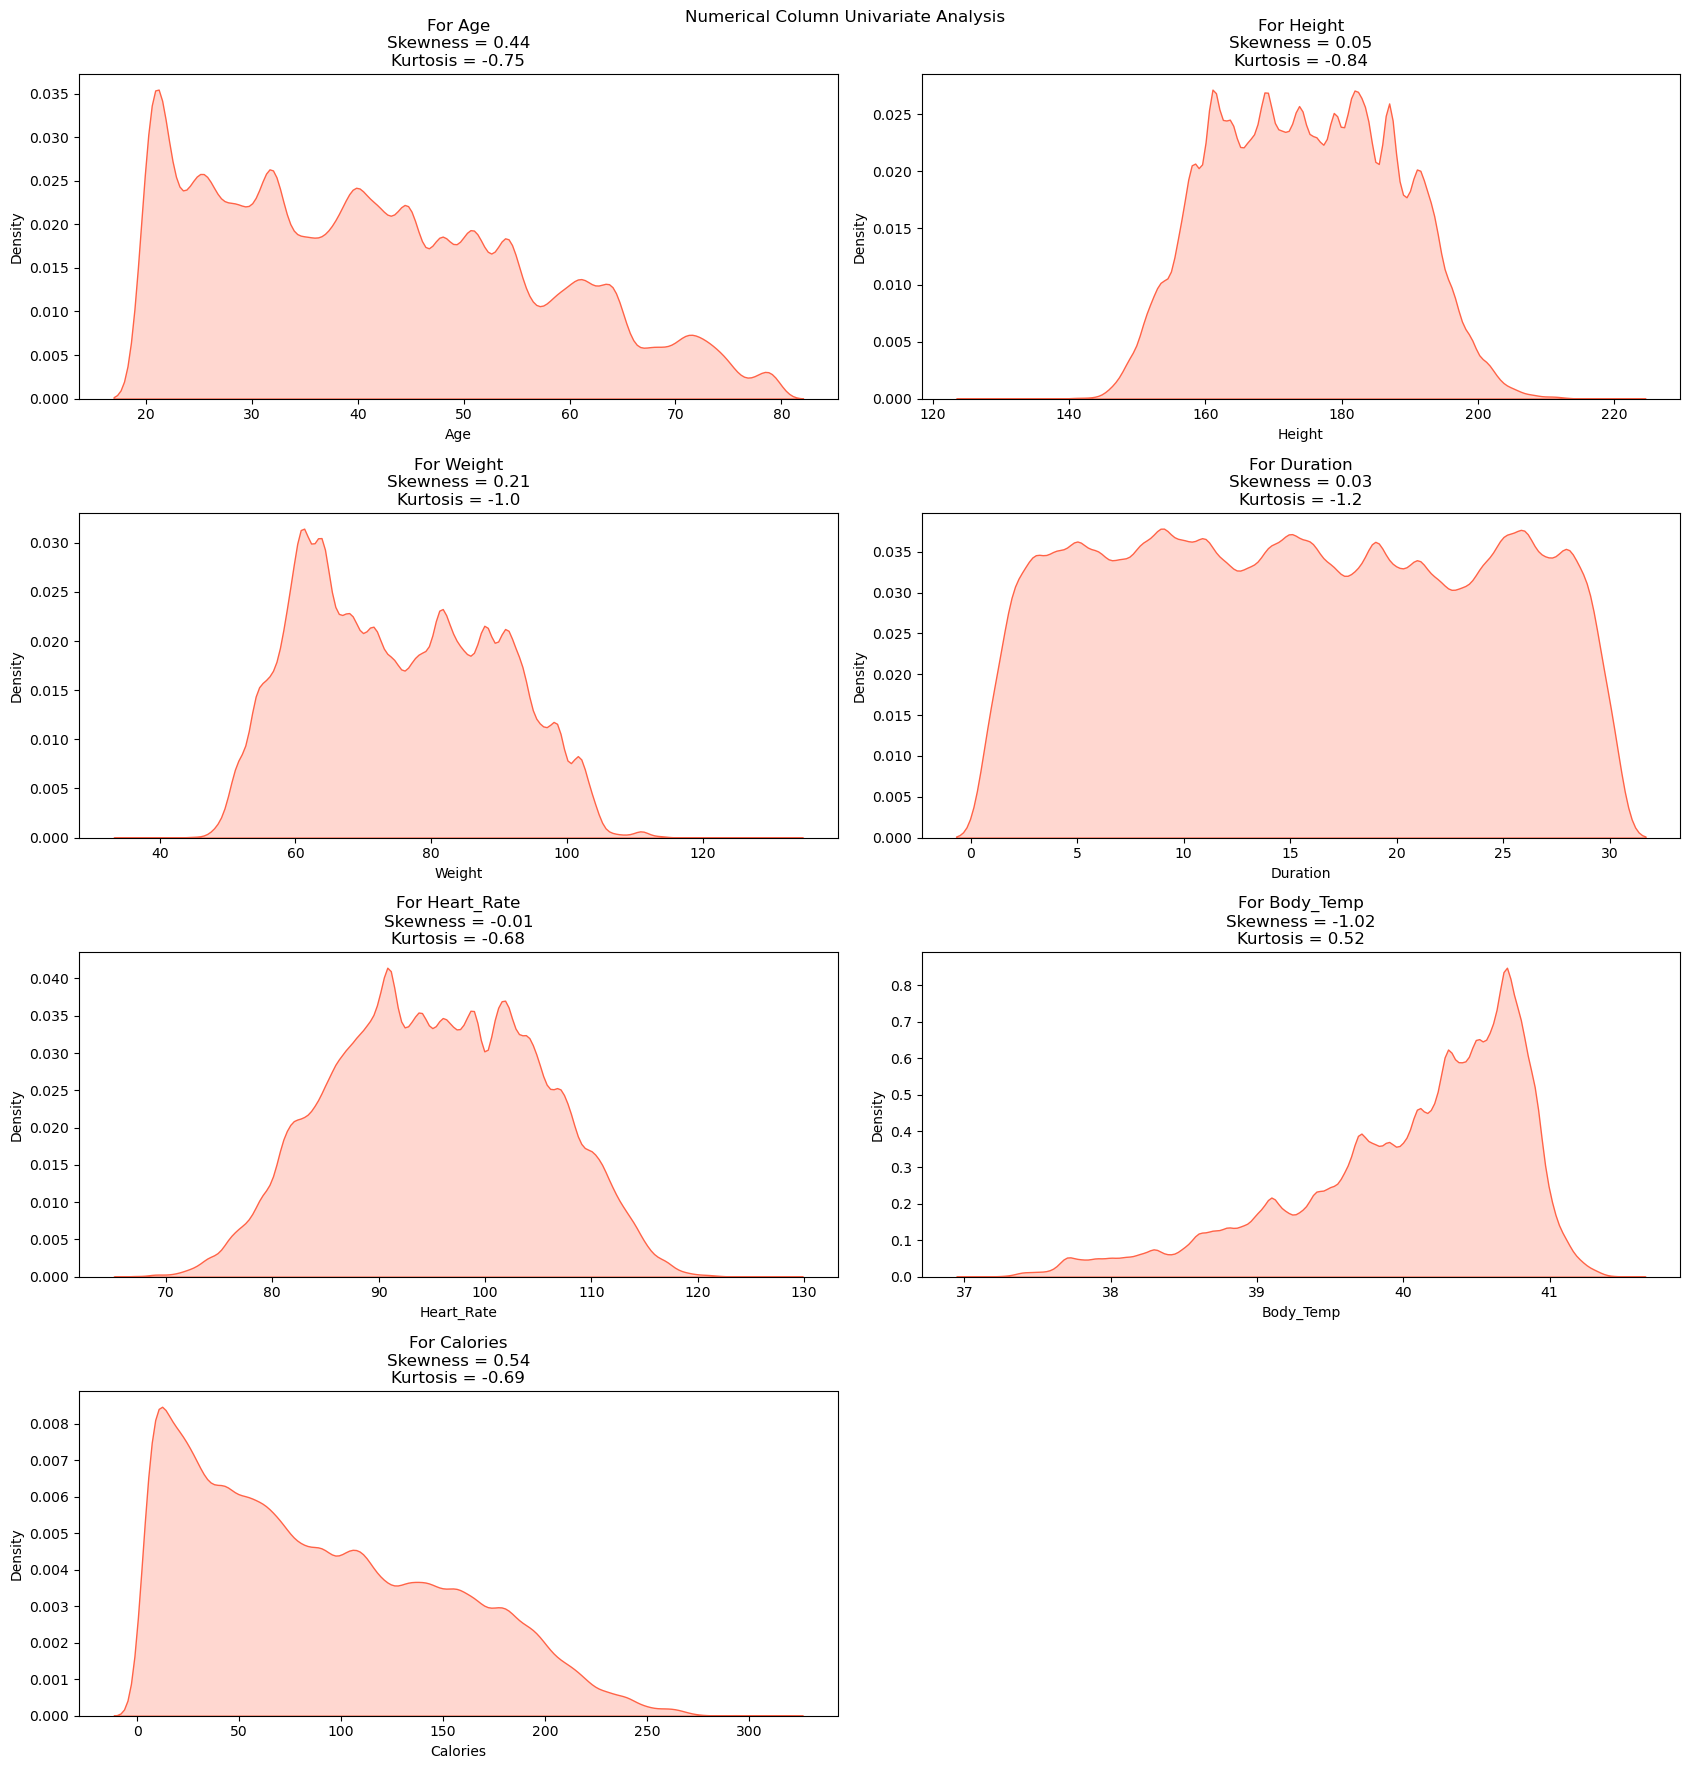

In [16]:
u = 1
plt.figure(figsize=(17,18))
plt.suptitle("Numerical Column Univariate Analysis")
for i in num_cols:
    plt.subplot(4,2,u)
    sns.kdeplot(data = train, x = i, color = "tomato", fill = True)
    plt.title(f'''For {i}
Skewness = {round(train[i].skew(), 2)}
Kurtosis = {round(train[i].kurt(), 2)}''')
    u += 1

plt.tight_layout()
plt.show()


### Univariate Analysis for Categorical COlumn

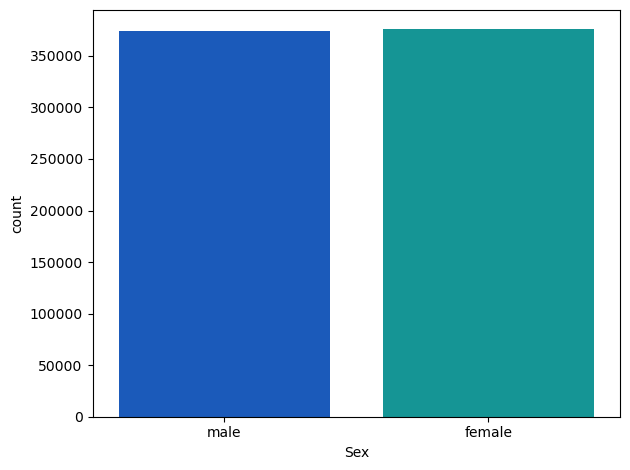

In [17]:
sns.countplot(data = train, x = 'Sex', palette='winter')
plt.tight_layout()
plt.show()


### Bivariate Analysis between Num-Num cols

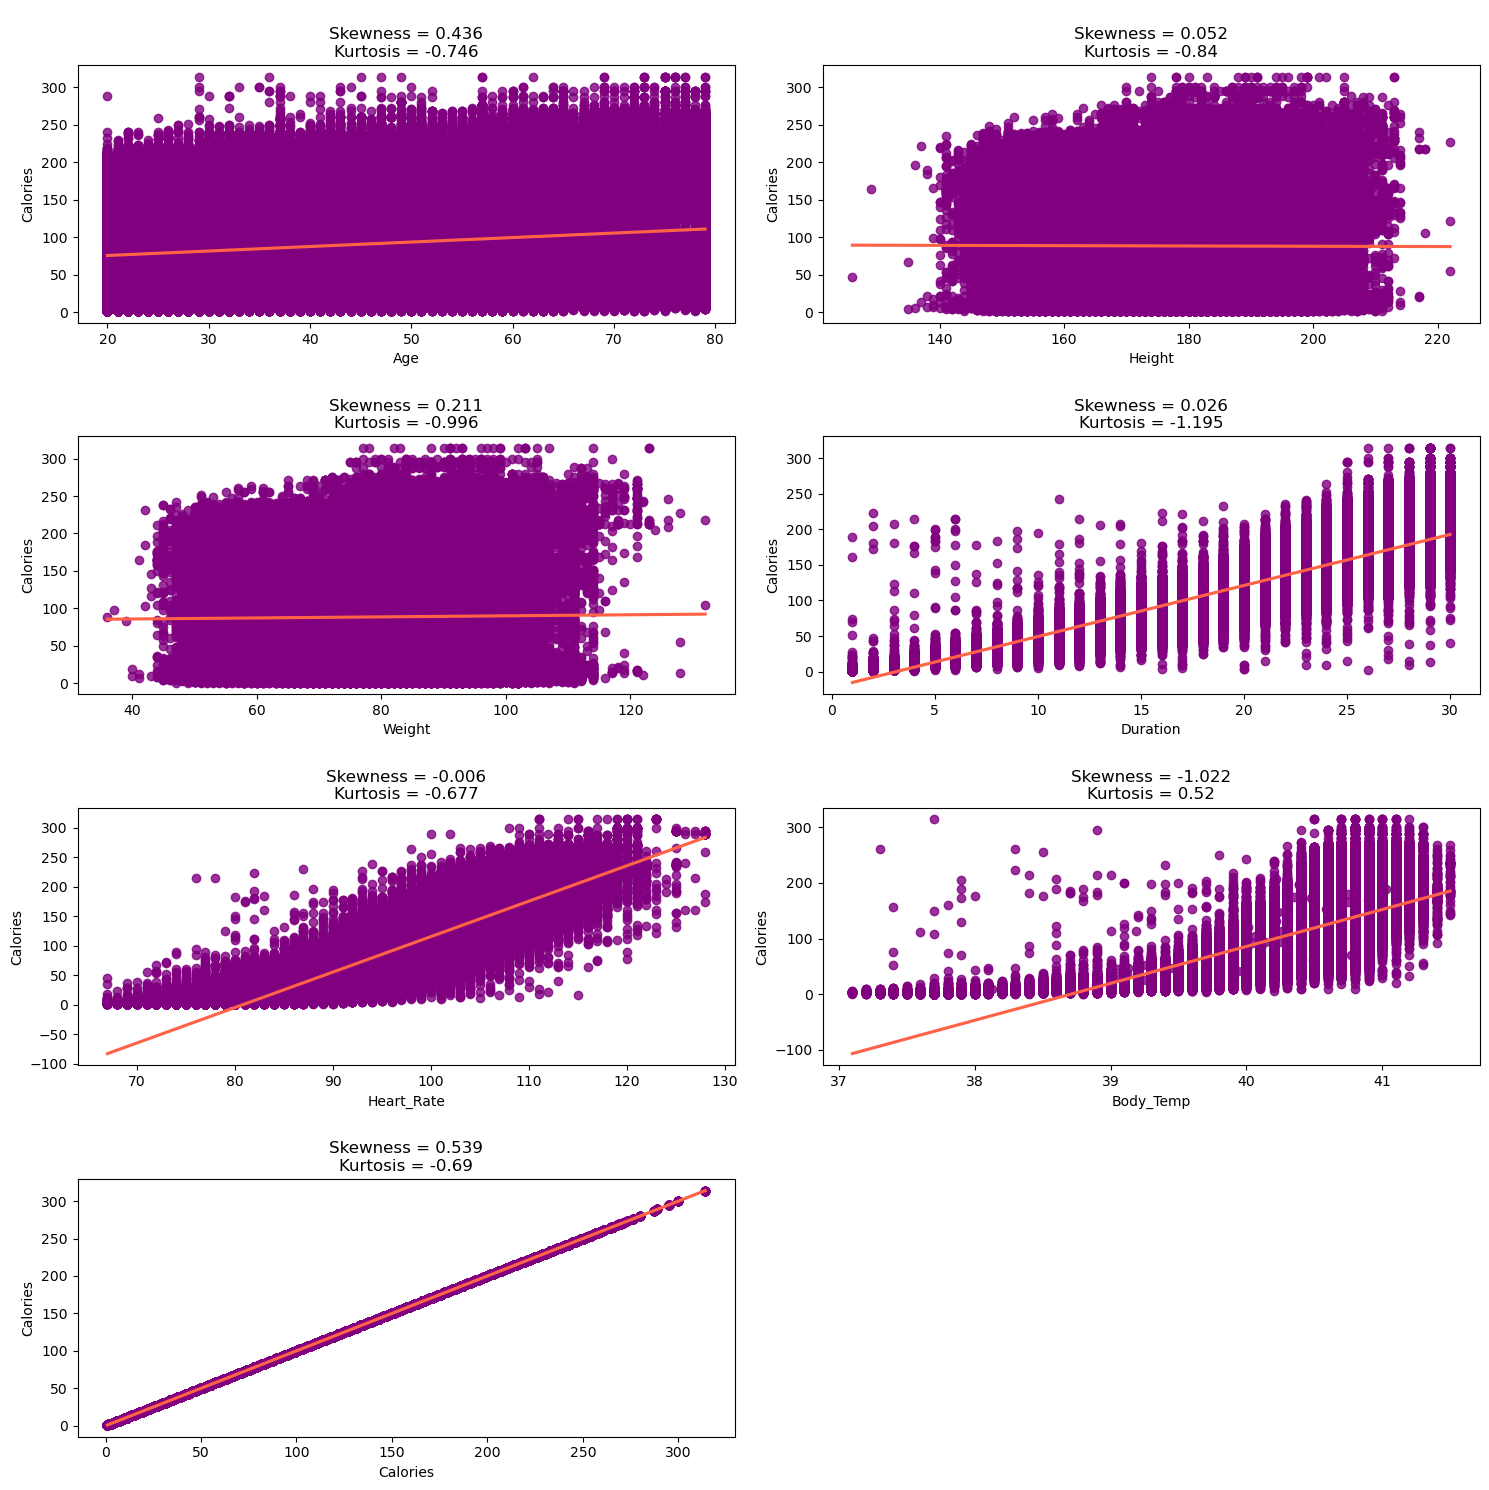

In [18]:
t = 1
plt.figure(figsize = (15,15))
for i in num_cols:
    plt.subplot(4,2,t)
    plt.title(f'''
Skewness = {round(train[i].skew(),3)}
Kurtosis = {round(train[i].kurt(),3)}''')
    sns.regplot(data = train, x = i, y = 'Calories', line_kws={"color" : 'tomato'}, color="purple")
    t = t+1

plt.tight_layout()
plt.show()

### Bivariate Analysis between Num-Cat cols

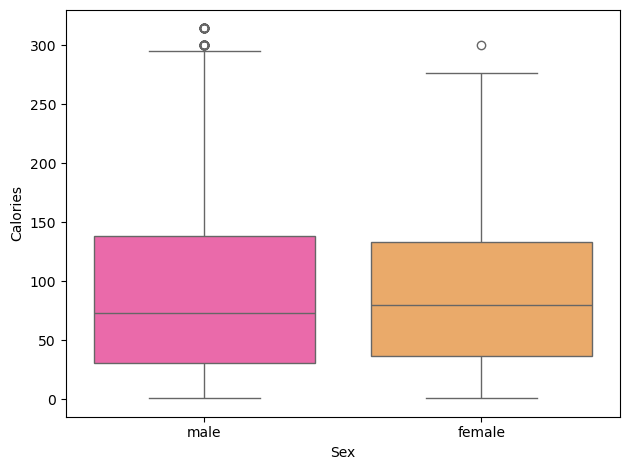

In [20]:
sns.boxplot(data = train, x = 'Sex', y = 'Calories', palette = 'spring')
plt.tight_layout()
plt.show()

### Outlier Detection

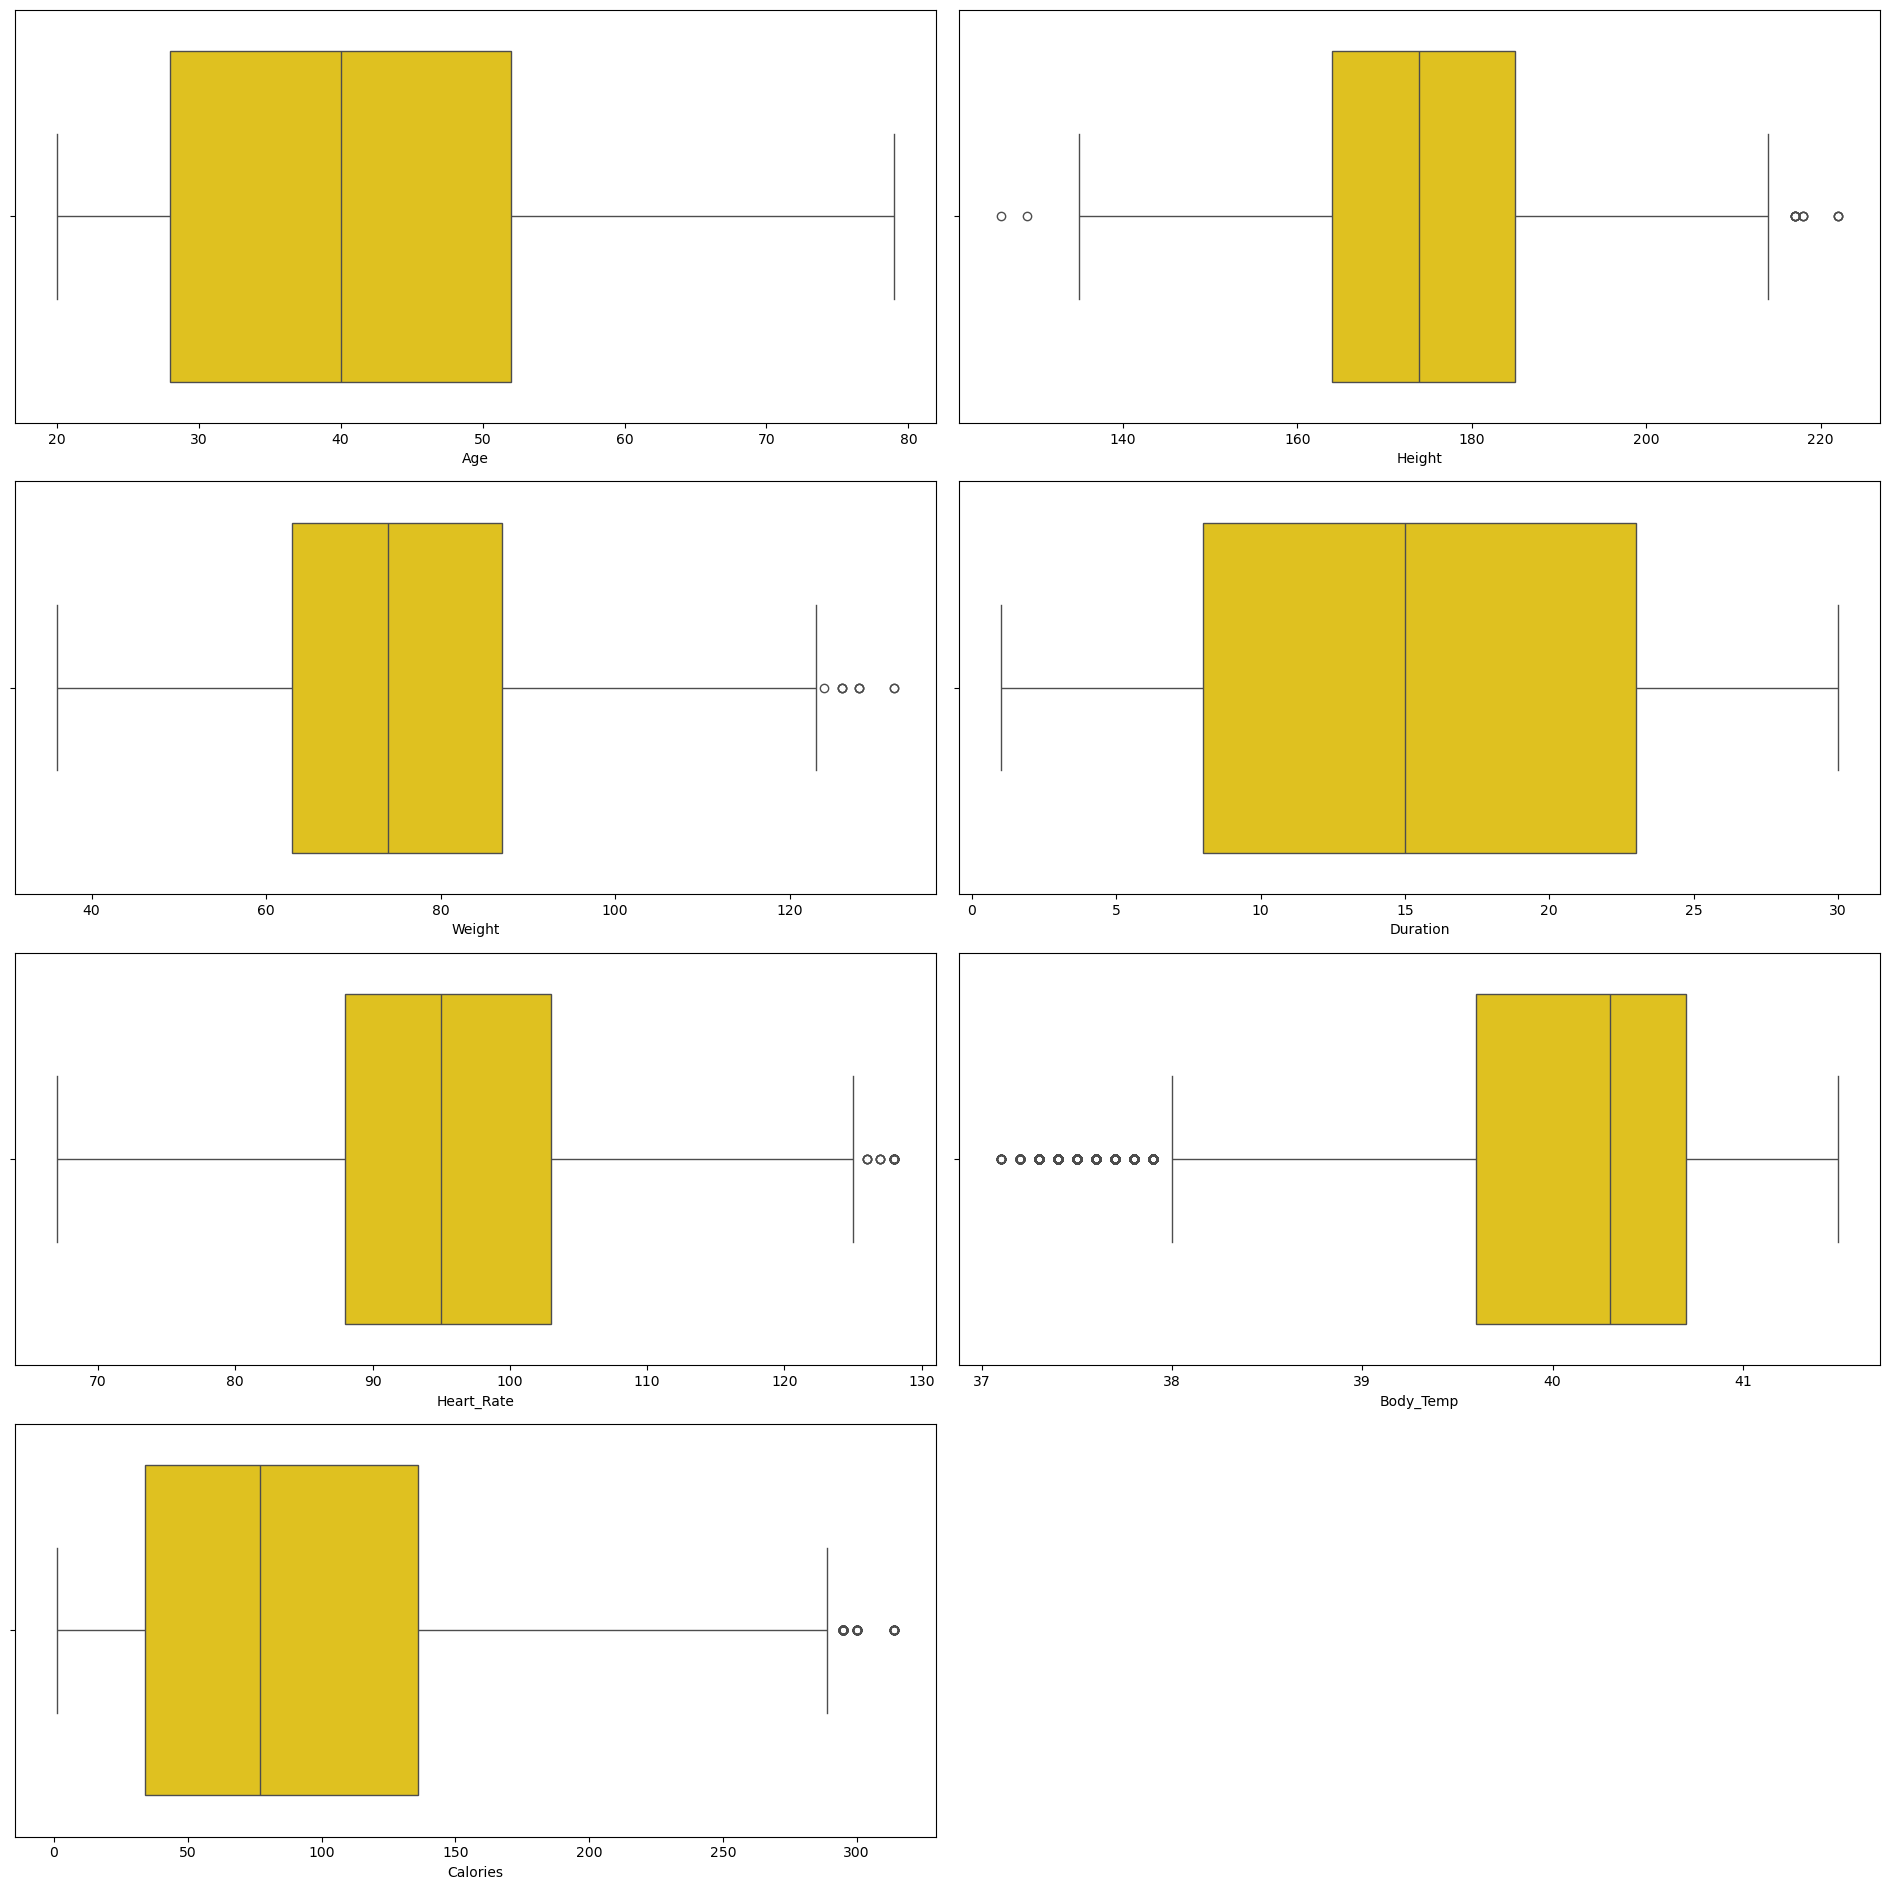

In [21]:
t = 1
plt.figure(figsize=(19,19))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data = train, x = i, color='gold')
    t += 1
plt.tight_layout()
plt.show()

Inferences :

- Data have few columns that have minimal outliers so we keep them as it is and to prevent data loss for minimal outliers we will opt for whis size = 3 which means that it will consider data upto 3 standard deviation as Normal 

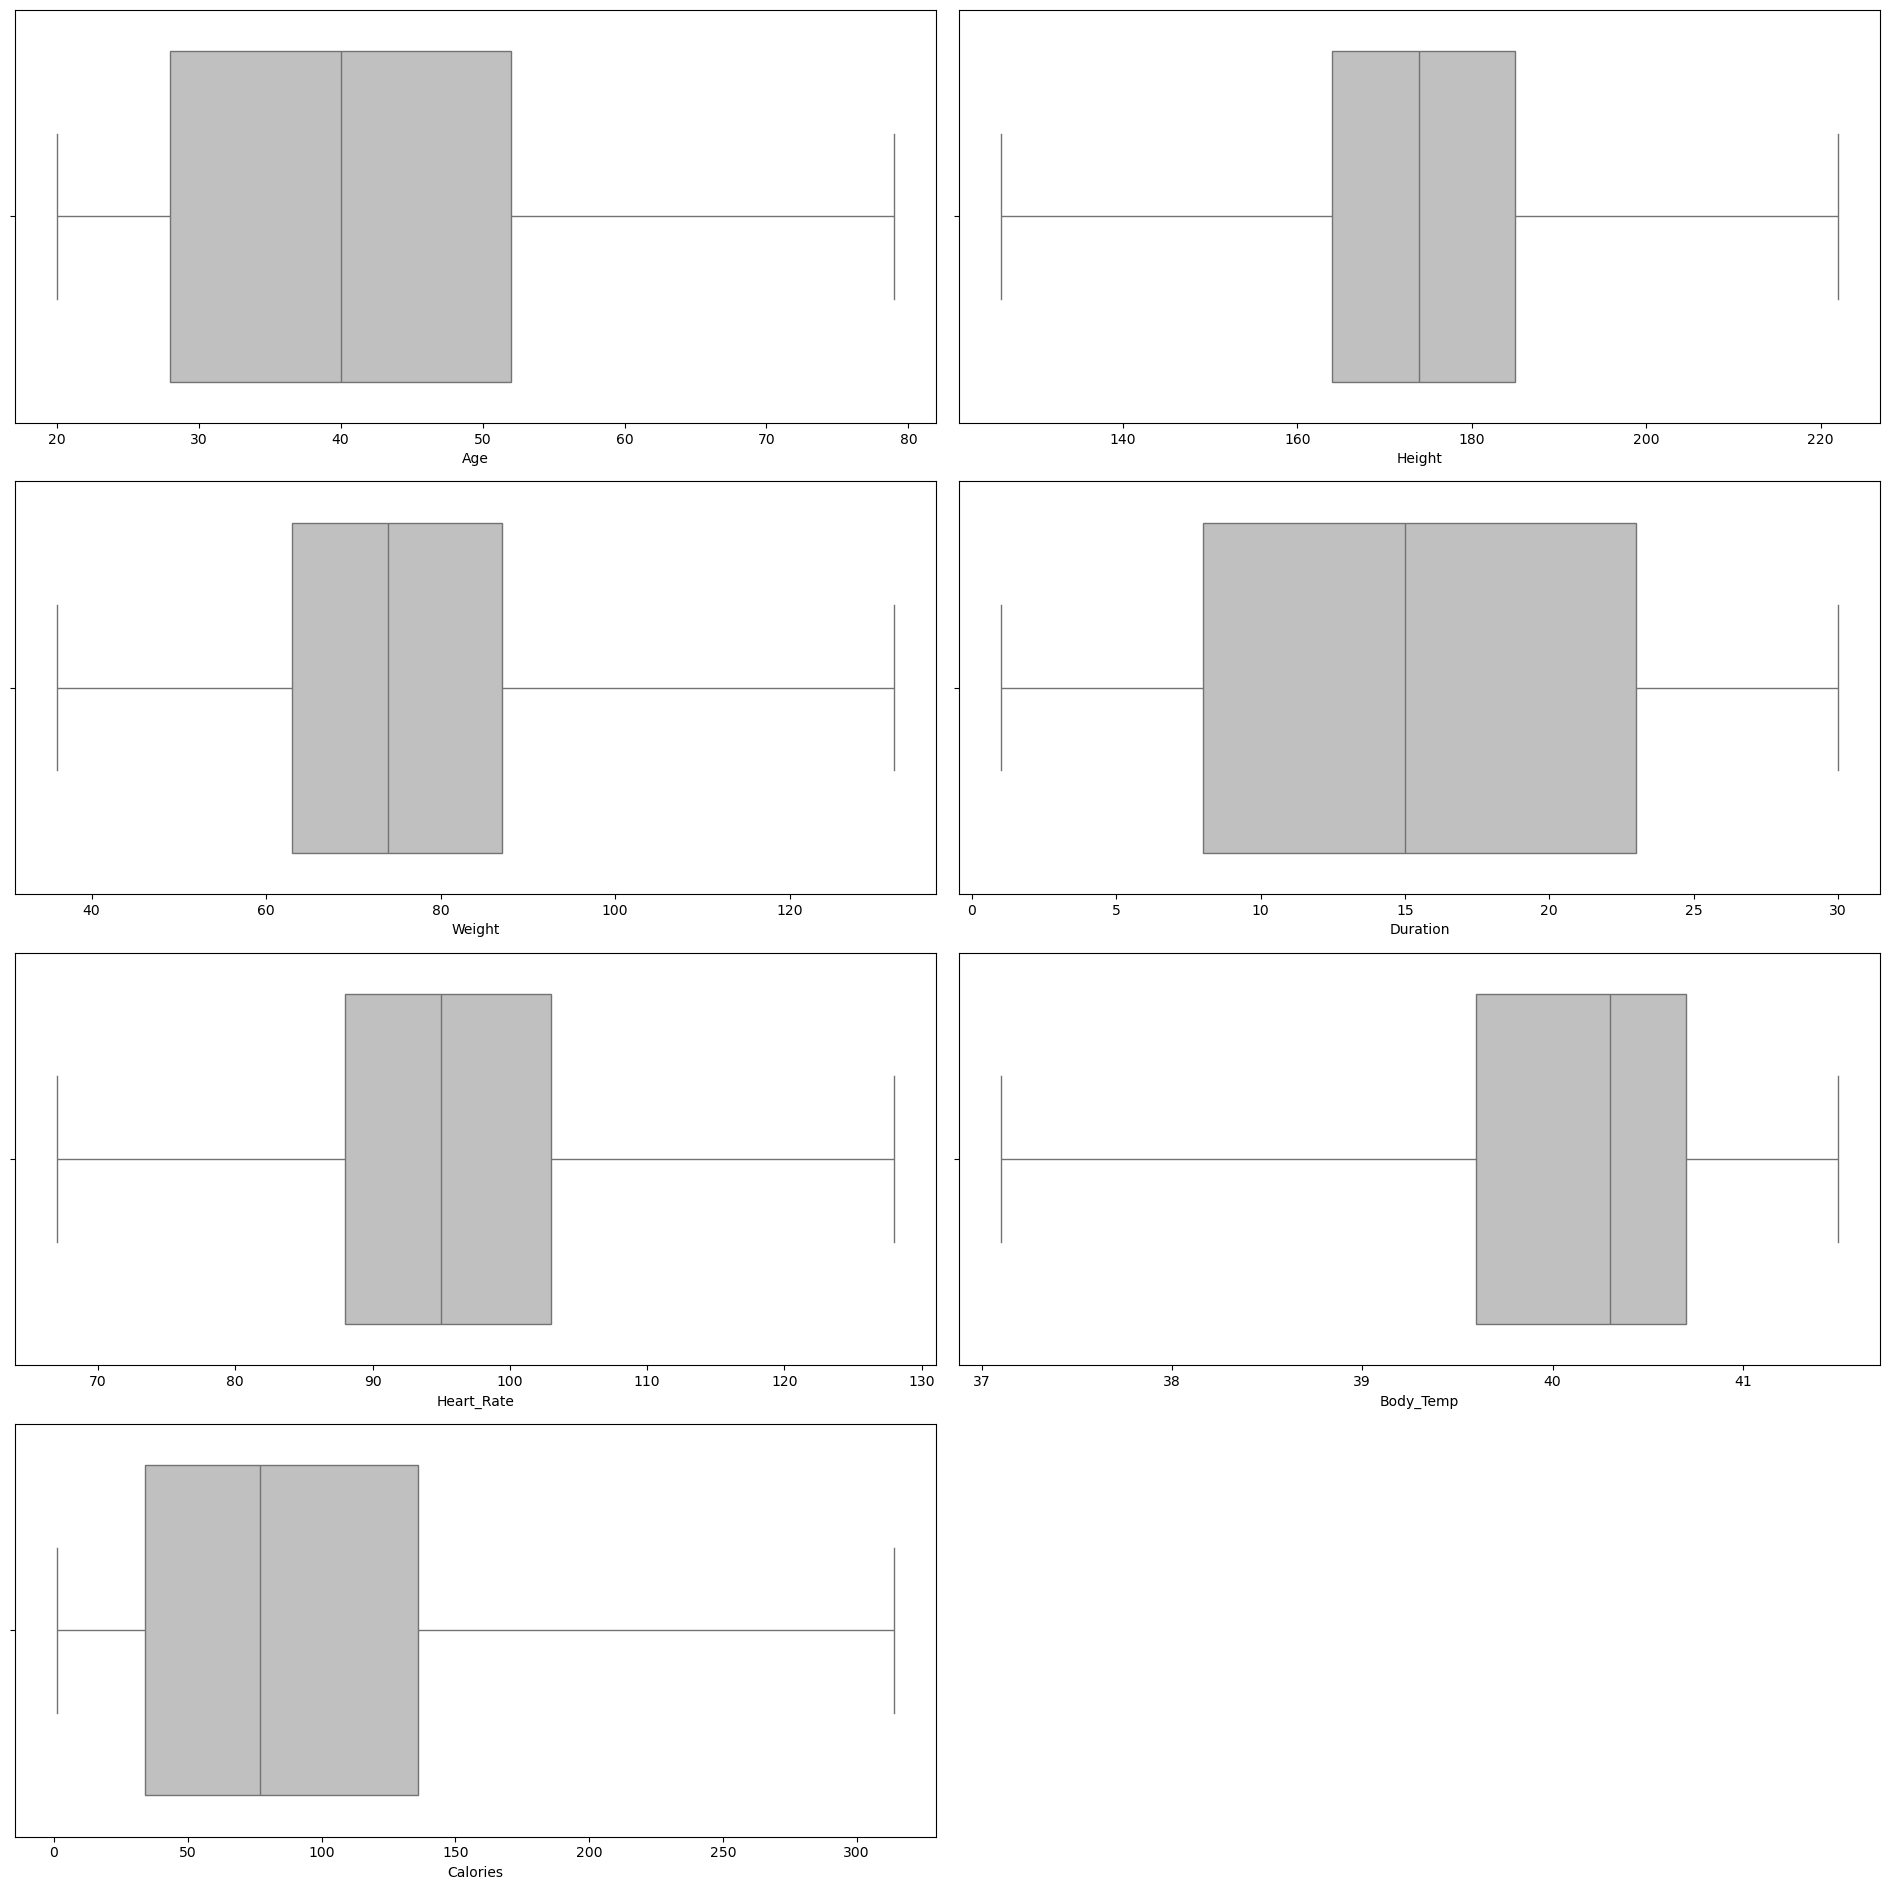

In [30]:
t = 1
plt.figure(figsize=(19,19))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data = train, x = i, color='silver', whis=3)
    t += 1
plt.tight_layout()
plt.show()

### Duplicate Value Treatment

In [32]:
train.duplicated().sum()

2841

Inferences :
 
- Data has 2841 duplicate Values Let's Remove them

In [33]:
train.drop_duplicates(inplace=True)

In [34]:
train.duplicated().sum()

0

### Missing Value Treatment

In [35]:
train.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [36]:
test.isnull().sum().sum()

0

### Feature Encoding

In [37]:
lb = LabelEncoder()

train['Sex'] = lb.fit_transform(train['Sex'])

train['Sex']

id
0         1
1         0
2         0
3         1
4         0
         ..
749995    1
749996    0
749997    1
749998    1
749999    0
Name: Sex, Length: 747159, dtype: int32

In [38]:
lb = LabelEncoder()

test['Sex'] = lb.fit_transform(test['Sex'])

test['Sex']

id
750000    1
750001    1
750002    0
750003    0
750004    0
         ..
999995    0
999996    1
999997    0
999998    0
999999    1
Name: Sex, Length: 250000, dtype: int32

### Machine Learning Models

In [39]:
x = train.drop(columns = "Calories")
y = train['Calories']

In [40]:
x

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,,
0,1,36,189.0,82.0,26.0,101.0,41.0
1,0,64,163.0,60.0,8.0,85.0,39.7
2,0,51,161.0,64.0,7.0,84.0,39.8
3,1,20,192.0,90.0,25.0,105.0,40.7
4,0,38,166.0,61.0,25.0,102.0,40.6
...,...,...,...,...,...,...,...
749995,1,28,193.0,97.0,30.0,114.0,40.9
749996,0,64,165.0,63.0,18.0,92.0,40.5
749997,1,60,162.0,67.0,29.0,113.0,40.9


In [41]:
y

id
0         150.0
1          34.0
2          29.0
3         140.0
4         146.0
          ...  
749995    230.0
749996     96.0
749997    221.0
749998    109.0
749999    103.0
Name: Calories, Length: 747159, dtype: float64

In [42]:
xtrain, xval, ytrain, yval = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=3)

In [43]:
print(f'''The Size of X_Train is {xtrain.shape}
The Size of X_Val is {xval.shape}
The Size of Y_Train is {ytrain.shape}
The Size of Y_Val is {yval.shape}''')

The Size of X_Train is (597727, 7)
The Size of X_Val is (149432, 7)
The Size of Y_Train is (597727,)
The Size of Y_Val is (149432,)


In [44]:

def model(model, xtr,ytr,xval,yval):
    mod = model
    mod.fit(xtr,ytr)
    pred = mod.predict(xval)

    pred = np.maximum(0, pred)

    print(f'Root Mean Squared error : {np.sqrt(mean_squared_log_error(yval, pred))}')

In [45]:
model(LinearRegression(), xtrain, ytrain, xval, yval)

Root Mean Squared error : 0.5654296448692372


In [46]:
model(AdaBoostRegressor(), xtrain, ytrain, xval, yval)

Root Mean Squared error : 0.5753842886558864


In [52]:
model(RandomForestRegressor(), xtrain, ytrain, xval, yval)

Root Mean Squared error : 0.06381372107221732


In [47]:
model(KNeighborsRegressor(), xtrain, ytrain, xval, yval)

Root Mean Squared error : 0.09873588477750583


In [48]:
model(GradientBoostingRegressor(), xtrain, ytrain, xval, yval)

Root Mean Squared error : 0.1308136002645139


In [49]:
model(XGBRegressor(), xtrain, ytrain, xval, yval)

Root Mean Squared error : 0.06389832447551459


In [50]:
model(LGBMRegressor(), xtrain, ytrain, xval, yval)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 597727, number of used features: 7
[LightGBM] [Info] Start training from score 88.381997
Root Mean Squared error : 0.0714425293963295


In [51]:
model(CatBoostRegressor(), xtrain, ytrain, xval, yval)

Learning rate set to 0.112426
0:	learn: 55.8843628	total: 188ms	remaining: 3m 7s
1:	learn: 50.1475925	total: 233ms	remaining: 1m 56s
2:	learn: 45.0441166	total: 281ms	remaining: 1m 33s
3:	learn: 40.4184081	total: 329ms	remaining: 1m 21s
4:	learn: 36.3455139	total: 376ms	remaining: 1m 14s
5:	learn: 32.7336947	total: 426ms	remaining: 1m 10s
6:	learn: 29.4984623	total: 475ms	remaining: 1m 7s
7:	learn: 26.6337982	total: 522ms	remaining: 1m 4s
8:	learn: 24.1222848	total: 569ms	remaining: 1m 2s
9:	learn: 21.8511747	total: 617ms	remaining: 1m 1s
10:	learn: 19.8280032	total: 658ms	remaining: 59.2s
11:	learn: 18.0633118	total: 705ms	remaining: 58s
12:	learn: 16.4728803	total: 749ms	remaining: 56.8s
13:	learn: 15.0653699	total: 798ms	remaining: 56.2s
14:	learn: 13.8152980	total: 839ms	remaining: 55.1s
15:	learn: 12.6941472	total: 884ms	remaining: 54.4s
16:	learn: 11.7216932	total: 926ms	remaining: 53.5s
17:	learn: 10.8363210	total: 970ms	remaining: 52.9s
18:	learn: 10.0645365	total: 1s	remaining

In [52]:
model(DecisionTreeRegressor(), xtrain, ytrain, xval, yval)

Root Mean Squared error : 0.08611166125889128


In [53]:
final_model = CatBoostRegressor()
final_model.fit(x,y)

Learning rate set to 0.116461
0:	learn: 55.6428040	total: 83.3ms	remaining: 1m 23s
1:	learn: 49.7015229	total: 155ms	remaining: 1m 17s
2:	learn: 44.4505823	total: 224ms	remaining: 1m 14s
3:	learn: 39.7355507	total: 282ms	remaining: 1m 10s
4:	learn: 35.6164188	total: 341ms	remaining: 1m 7s
5:	learn: 31.9437924	total: 397ms	remaining: 1m 5s
6:	learn: 28.6718994	total: 457ms	remaining: 1m 4s
7:	learn: 25.7797467	total: 515ms	remaining: 1m 3s
8:	learn: 23.2630877	total: 576ms	remaining: 1m 3s
9:	learn: 20.9971645	total: 635ms	remaining: 1m 2s
10:	learn: 19.0143502	total: 694ms	remaining: 1m 2s
11:	learn: 17.2628204	total: 748ms	remaining: 1m 1s
12:	learn: 15.6901559	total: 802ms	remaining: 1m
13:	learn: 14.2931667	total: 858ms	remaining: 1m
14:	learn: 13.0809107	total: 919ms	remaining: 1m
15:	learn: 12.0036059	total: 975ms	remaining: 60s
16:	learn: 11.0419672	total: 1.03s	remaining: 59.8s
17:	learn: 10.1945600	total: 1.09s	remaining: 59.3s
18:	learn: 9.4673773	total: 1.14s	remaining: 58.8s

In [54]:
final_pred = final_model.predict(test)

In [55]:

samp

,Calories
id,
750000,88.283
750001,88.283
750002,88.283
750003,88.283
750004,88.283
...,...
999995,88.283
999996,88.283
999997,88.283


In [56]:
samp['Calories'] = final_pred
samp

,Calories
id,
750000,26.533901
750001,108.311936
750002,87.207179
750003,125.658284
750004,76.571490
...,...
999995,26.151994
999996,9.308222
999997,73.327922


In [57]:
samp.to_csv("1st Submission", index = False)